In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from IPython.display import display

# For correlation heatmap and pair plot
from sklearn.metrics import confusion_matrix  # If needed for display
from sklearn.metrics import ConfusionMatrixDisplay
import requests  # For loading data from a URL or API

In [ ]:
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

In [ ]:
# Exploring Dataset Content
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.tail()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [ ]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)

In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  195


In [ ]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


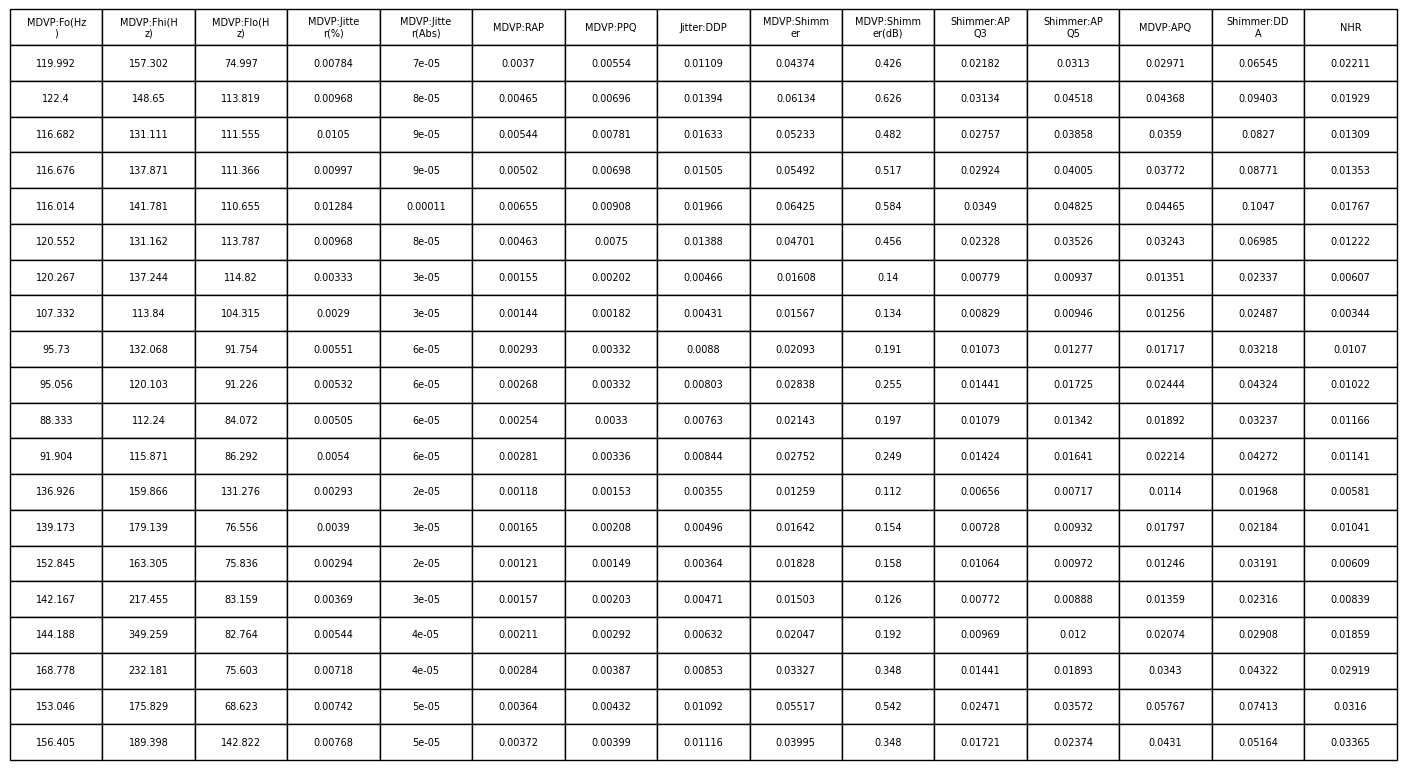

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Sample only the first 20 rows and first 15 columns
df_sample = df.iloc[:20, :15]

# Wrap column headers for better visibility
wrapped_labels = ['\n'.join(textwrap.wrap(col, width=10)) for col in df_sample.columns]

# Create the figure
fig, ax = plt.subplots(figsize=(16, 8))  # Adjust width and height as needed
ax.axis('off')

# Create the table
tbl = ax.table(cellText=df_sample.values,
               colLabels=wrapped_labels,
               loc='center',
               cellLoc='center',
               colLoc='center')

# Formatting
tbl.auto_set_font_size(False)
tbl.set_fontsize(7)
tbl.scale(1.5, 2.0)  # Wider and taller cells for clarity

# Tight layout
plt.tight_layout(pad=2.0)
plt.savefig('csv_snapshot_wrapped_15cols.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df['status'] = df['status'].astype('uint8')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [ ]:
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [ ]:
# Checking For Missing Values In Dataset
df.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


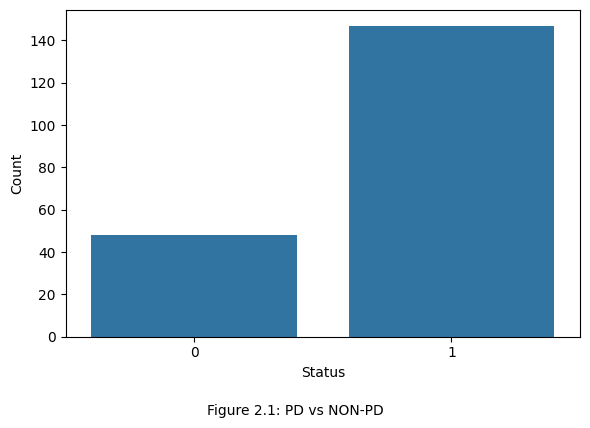

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(6, 4))

# Create countplot
sns.countplot(x='status', data=df)

# Darken both axes
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')

# Label axes
plt.xlabel('Status')
plt.ylabel('Count')

# Add title/caption below the plot
plt.figtext(0.5, -0.05, 'Figure 2.1: PD vs NON-PD', wrap=True, horizontalalignment='center', fontsize=10)

# Tight layout to fit everything
plt.tight_layout()

# Save the plot
plt.savefig('figure_2_1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


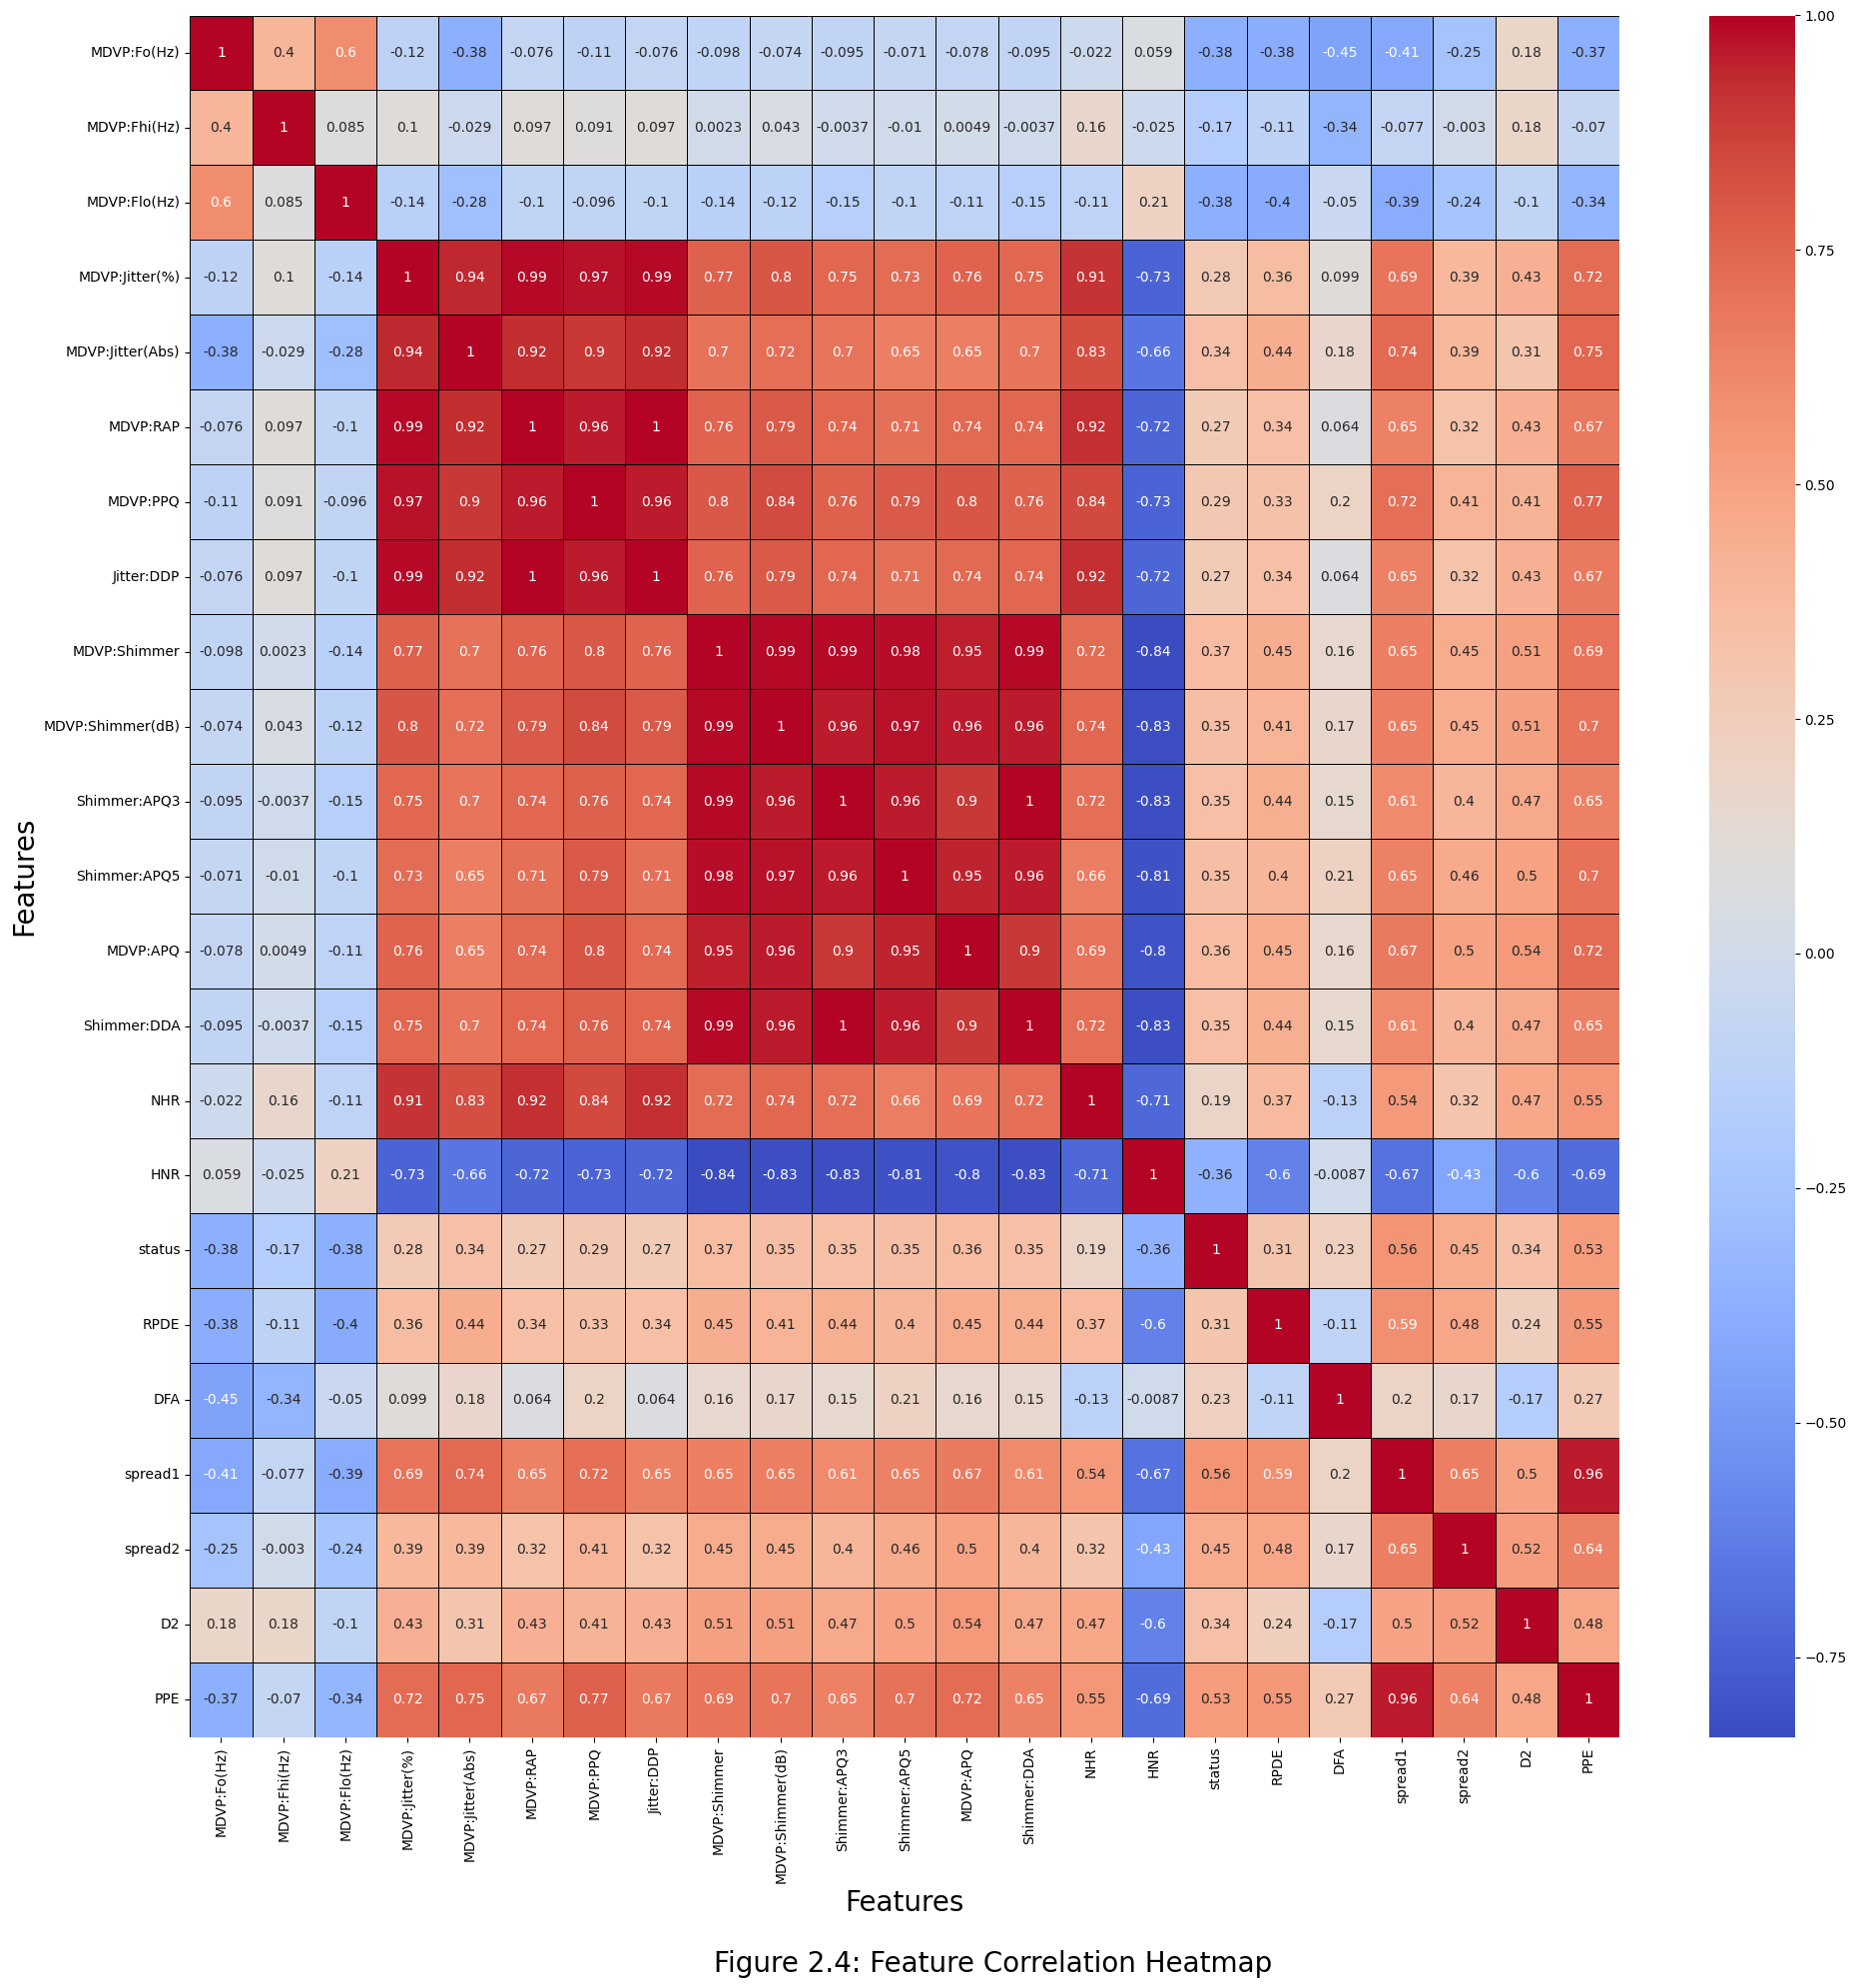

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the heatmap with annotations
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Set axis labels with Times New Roman and size 15
ax.set_xlabel("Features", fontsize=20, color='black')
ax.set_ylabel("Features", fontsize=20, color='black')

# Darken all four spines (border lines)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

# Darken tick labels
ax.tick_params(axis='both', colors='black', labelsize=10)

# Add a caption below the plot with Times New Roman, size 15
plt.figtext(0.5, 0.01, 'Figure 2.4: Feature Correlation Heatmap', wrap=True,
            horizontalalignment='center', fontsize=20)

# Adjust layout to make room for caption
plt.tight_layout(rect=[0, 0.03, 1, 1])

# Save the heatmap
fig.savefig('heatmap_image3.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



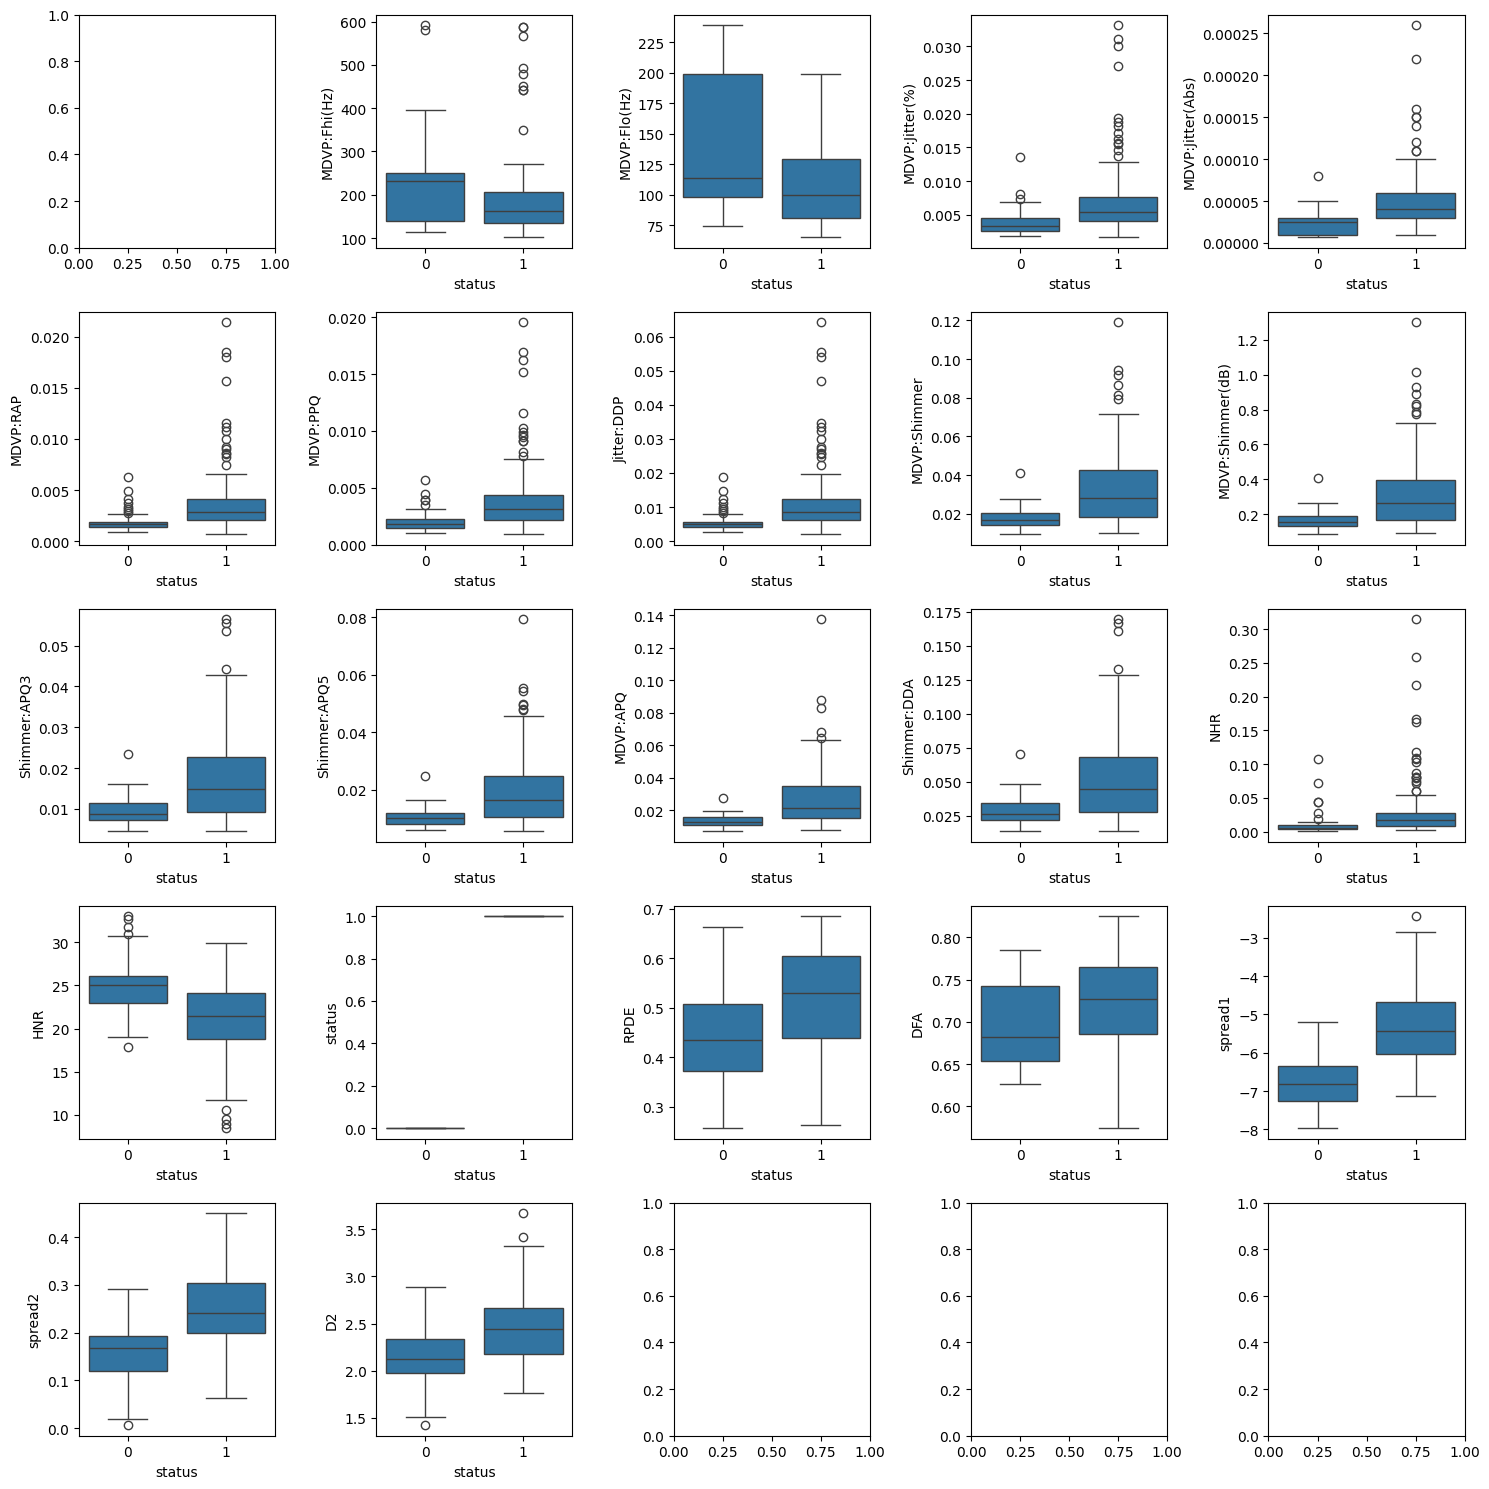

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the subplots (5x5 grid for your box plots)
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

# Loop through the columns and create a boxplot for each
for i in range(1, len(df.columns)-1):  # Excluding the first and last columns (if required)
    sns.boxplot(x='status', y=df.iloc[:, i], data=df, orient='v', ax=axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Save the box plots to an image file (e.g., PNG)
fig.savefig('box_plots.png', dpi=300, bbox_inches='tight')

# Optionally, display the plots
plt.show()

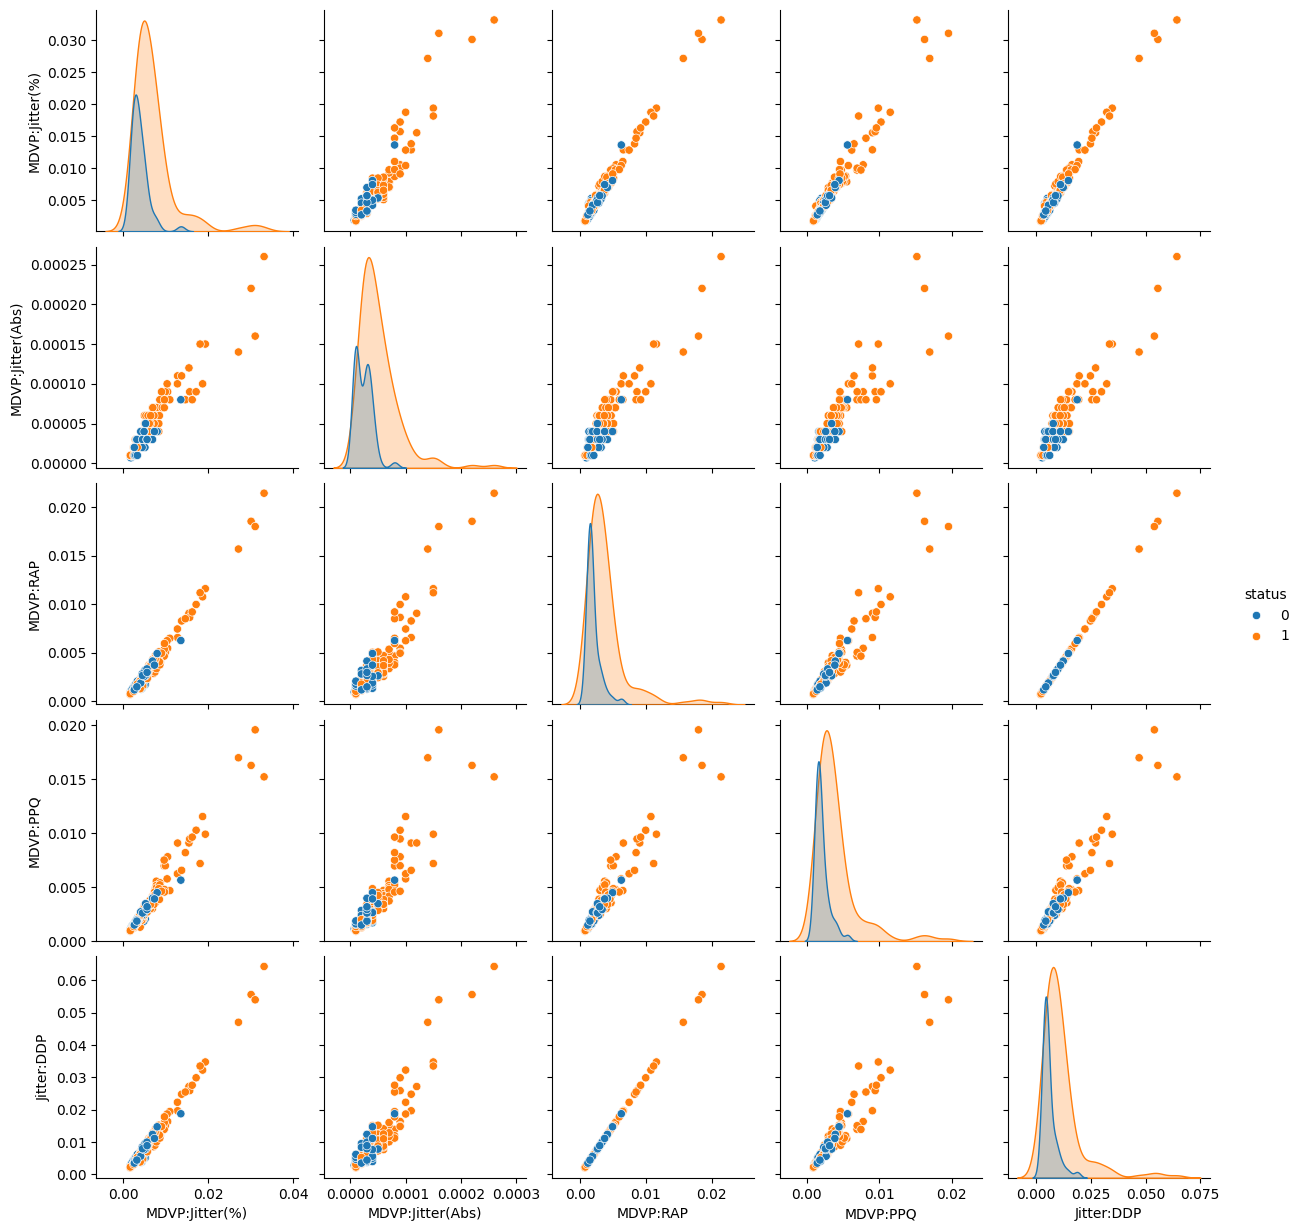

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size using rcParams
plt.rcParams['figure.figsize'] = (15, 4)

# Create the pair plot
pairplot = sns.pairplot(df, hue='status', vars=['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'])

# Save the pair plot to an image file (e.g., PNG)
pairplot.savefig('pairplot_image.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot
plt.show()

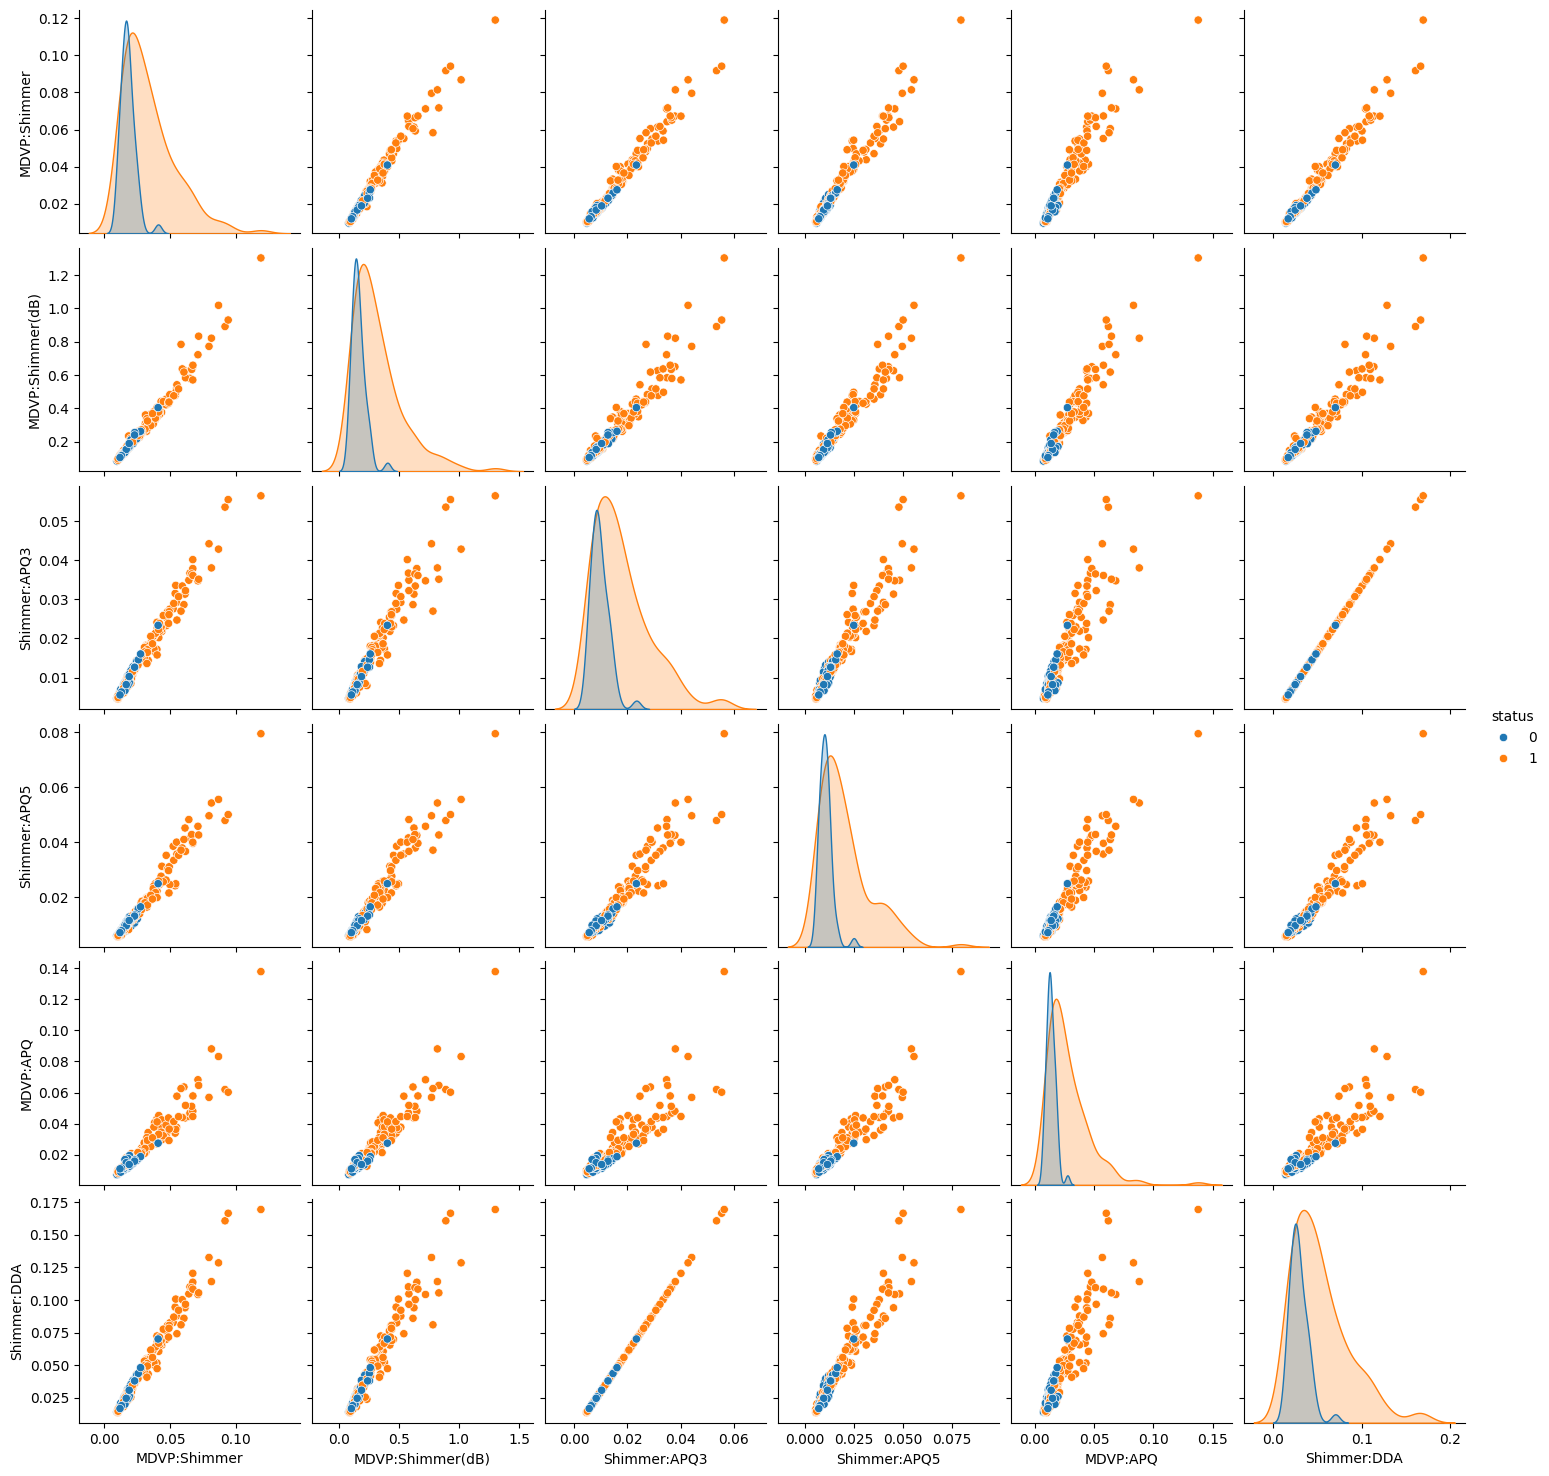

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size using rcParams
plt.rcParams['figure.figsize'] = (15, 4)

# Create the pair plot with the specified variables
pairplot = sns.pairplot(df, hue='status', vars=['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'])

# Save the pair plot to an image file (e.g., PNG)
pairplot.savefig('pairplot_shimmer_image.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot
plt.show()

In [ ]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [ ]:
# Scaling features between -1 and 1  for mormalization
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
scaler = StandardScaler()

In [ ]:

X_scaled = scaler.fit_transform(X)
# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
print('Feature (X) Shape After Balancing :', X_resampled.shape)
print('Target (y) Shape After Balancing :', y_resampled.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


Plot saved successfully.


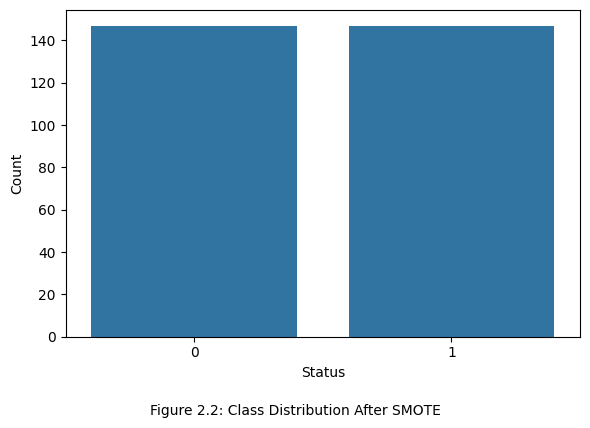

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 4))

# Plot the class distribution of the target variable (status) after SMOTE
sns.countplot(x=y_resampled)

# Darken axes and ticks
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')

# Label axes
plt.xlabel('Status')
plt.ylabel('Count')

# Add caption below the plot
plt.figtext(0.5, -0.05, 'Figure 2.2: Class Distribution After SMOTE', wrap=True, horizontalalignment='center', fontsize=10)

# Apply tight layout for clean saving
plt.tight_layout()

# Save the plot
try:
    plt.savefig(r'C:\Users\ABHISHEK PANDEY\OneDrive\Desktop\parkinsons\class_distribution_after_smote.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully.")
except Exception as e:
    print("Error saving plot:", e)

# Show the plot
plt.show()


In [ ]:
smote_counts = pd.Series(y_resampled).value_counts()
print(smote_counts)

status
1    147
0    147
Name: count, dtype: int64


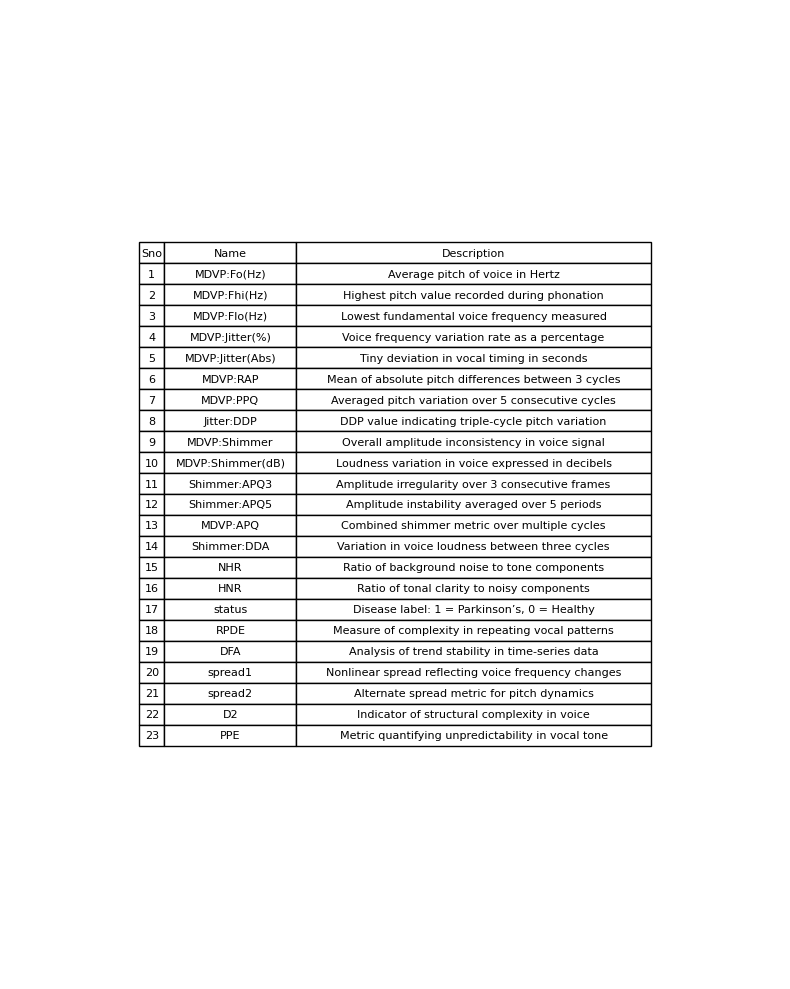

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
    "Sno": list(range(1, 24)),
    "Name": [
        "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)",
        "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)",
        "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR",
        "HNR", "status", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"
    ],
    "Description": [
        "Average pitch of voice in Hertz",
        "Highest pitch value recorded during phonation",
        "Lowest fundamental voice frequency measured",
        "Voice frequency variation rate as a percentage",
        "Tiny deviation in vocal timing in seconds",
        "Mean of absolute pitch differences between 3 cycles",
        "Averaged pitch variation over 5 consecutive cycles",
        "DDP value indicating triple-cycle pitch variation",
        "Overall amplitude inconsistency in voice signal",
        "Loudness variation in voice expressed in decibels",
        "Amplitude irregularity over 3 consecutive frames",
        "Amplitude instability averaged over 5 periods",
        "Combined shimmer metric over multiple cycles",
        "Variation in voice loudness between three cycles",
        "Ratio of background noise to tone components",
        "Ratio of tonal clarity to noisy components",
        "Disease label: 1 = Parkinson’s, 0 = Healthy",
        "Measure of complexity in repeating vocal patterns",
        "Analysis of trend stability in time-series data",
        "Nonlinear spread reflecting voice frequency changes",
        "Alternate spread metric for pitch dynamics",
        "Indicator of structural complexity in voice",
        "Metric quantifying unpredictability in vocal tone"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot table
fig, ax = plt.subplots(figsize=(8, 10))
ax.axis('off')

# Create table
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust font and cell sizing
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)

# Set appropriate column widths based on string lengths
col_widths = [0.05, 0.15, 0.4]  # Proportional width: small, medium, and compact to fit text closely
for i, width in enumerate(col_widths):
    tbl.auto_set_column_width(i)
    for key, cell in tbl.get_celld().items():
        if key[1] == i:
            cell.set_width(width)

plt.tight_layout()
plt.savefig('compact_proper_width_table.png', dpi=300)
plt.show()